In [ ]:
import csv
import string
import os
import json
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import defaultdict
from langdetect import detect
from wordcloud import WordCloud
from nltk.corpus import stopwords

#label font
font = {'family' : 'sans-serif',
        # 'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

#color palette
plt.style.use("seaborn-v0_8-colorblind")

#figure size
default_figsize = (10,4)
matplotlib.rcParams["figure.figsize"] = default_figsize

In [9]:
import pandas as pd

file_path = "../data/nature_ignacio_acadmic_starter_packs/starterpacks.csv"

file = pd.read_csv(file_path)

file_with_description = file[file['description'].notna()]

total_with_description = len(file_with_description)

print(f"Total starter packs with descriptions: {total_with_description}")

Total starter packs with descriptions: 58126


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "../data/nature_ignacio_academic_starter_packs/starterpacks.csv"
data = pd.read_csv(file_path)

total_starter_packs = len(data)

non_empty_descriptions = data[data['description'].notna()]
empty_descriptions = data[data['description'].isna()]

total_with_descriptions = len(non_empty_descriptions)
total_without_descriptions = len(empty_descriptions)

academic_keywords = [
    # 'academic', 'academia', 'academics',  'university', 
    # 'universities', 'research', 'researcher',  
    # 'professor', 'professors', 'scholar', 'scholars', 'lecturer', 
    'science', 'scientists',
]

academic_affiliated = non_empty_descriptions[
    non_empty_descriptions['description'].str.contains('|'.join(academic_keywords), case=False, na=False)
]

total_academic_affiliated = len(academic_affiliated)
percentage_academic = (total_academic_affiliated / total_with_descriptions) * 100 if total_with_descriptions > 0 else 0
percentage_with_descriptions = (total_with_descriptions / total_starter_packs) * 100 if total_starter_packs > 0 else 0
percentage_without_descriptions = (total_without_descriptions / total_starter_packs) * 100 if total_starter_packs > 0 else 0

print("===== Summary =====")
print(f"Total starter packs: {total_starter_packs}")
print(f"Total with descriptions: {total_with_descriptions} ({percentage_with_descriptions:.2f}%)")
print(f"Total without descriptions: {total_without_descriptions} ({percentage_without_descriptions:.2f}%)")
print(f"Total affiliated with academics: {total_academic_affiliated} ({percentage_academic:.2f}%)")

# Save academic-related rows to a CSV file
academic_affiliated.to_csv("../data/nature_ignacio_academic_starter_packs/academic_starterpacks.csv", index=False)

===== Summary =====
Total starter packs: 235352
Total with descriptions: 58126 (24.70%)
Total without descriptions: 177226 (75.30%)
Total affiliated with academics: 1225 (2.11%)


In [19]:


starterpacks_path = "../data/nature_ignacio_academic_starter_packs/starterpacks.csv"

starterpacks_data = pd.read_csv(starterpacks_path)

participants_path = "../data/starter_packs/starter_pack_users.csv"
participants_data = pd.read_csv(participants_path)

total_starter_packs = len(starterpacks_data)

# Filter rows with and without descriptions
non_empty_descriptions = starterpacks_data[starterpacks_data['description'].notna()]
empty_descriptions = starterpacks_data[starterpacks_data['description'].isna()]

total_with_descriptions = len(non_empty_descriptions)
total_without_descriptions = len(empty_descriptions)

# Expanded keywords related to academics
academic_keywords = [
    'academic', 'academia', 'academics', 'university', 
    'universities', 'research', 'researcher',  
    'professor', 'professors', 'scholar', 'scholars', 'lecturer', 
    'lecturers', 'science', 'scientists', 
]

academic_affiliated = non_empty_descriptions[
    non_empty_descriptions['description'].str.contains('|'.join(academic_keywords), case=False, na=False)
]

academic_uris = academic_affiliated['uri'].tolist()
academic_participants = participants_data[participants_data['uri'].isin(academic_uris)]
academic_participants['num_participants'] = academic_participants['participants'].str.split(';').str.len()
total_participants_academic = academic_participants['num_participants'].sum()

all_participants = participants_data
all_participants['num_participants'] = all_participants['participants'].str.split(';').str.len()
total_participants_all = all_participants['num_participants'].sum()

all_participants_list = all_participants['participants'].str.split(';').explode()
unique_participants_all = all_participants_list.unique()
total_unique_participants_all = len(unique_participants_all)

# unique participants for academic-affiliated starter packs
academic_participants_list = academic_participants['participants'].str.split(';').explode()
unique_participants_academic = academic_participants_list.unique()
total_unique_participants_academic = len(unique_participants_academic)

#  percentages
percentage_with_descriptions = (total_with_descriptions / total_starter_packs) * 100 if total_starter_packs > 0 else 0
percentage_without_descriptions = (total_without_descriptions / total_starter_packs) * 100 if total_starter_packs > 0 else 0
percentage_academic = (len(academic_affiliated) / total_with_descriptions) * 100 if total_with_descriptions > 0 else 0
percentage_participants_academic = (total_participants_academic / total_participants_all) * 100 if total_participants_all > 0 else 0
percentage_unique_participants_academic = (total_unique_participants_academic / total_unique_participants_all) * 100 if total_unique_participants_all > 0 else 0

print("===== Summary =====")
print(f"Total starter packs: {total_starter_packs}")
print(f"Total with descriptions: {total_with_descriptions} ({percentage_with_descriptions:.2f}%)")
print(f"Total without descriptions: {total_without_descriptions} ({percentage_without_descriptions:.2f}%)")
print(f"Total affiliated with academics: {len(academic_affiliated)} ({percentage_academic:.2f}%)")
print(f"Total participants in academic-affiliated starter packs: {total_participants_academic} ({percentage_participants_academic:.2f}%)")
print(f"Total unique participants in all starter packs: {total_unique_participants_all}")
print(f"Total unique participants in academic-affiliated starter packs: {total_unique_participants_academic} ({percentage_unique_participants_academic:.2f}%)")

/tmp/ipykernel_906204/3300018449.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  academic_participants['num_participants'] = academic_participants['participants'].str.split(';').str.len()


===== Summary =====
Total starter packs: 235352
Total with descriptions: 58126 (24.70%)
Total without descriptions: 177226 (75.30%)
Total affiliated with academics: 3423 (5.89%)
Total participants in academic-affiliated starter packs: 149113.0 (2.59%)
Total unique participants in all starter packs: 1188603
Total unique participants in academic-affiliated starter packs: 84280 (7.09%)


Top 10 users by participation count in academic starter packs:
                                             user_id  participation_count  \
9  did:plc:e62gb2ushvtvjvqcbrxeaw2n:chrislhayes.b...                   46   
8  did:plc:y5xyloyy7s4a2bwfeimj7r3b:mcuban.bsky.s...                   49   
7      did:plc:a4pqq234yw7fqbddawjo7y35:theonion.com                   50   
6  did:plc:h7obn4tkp47wn7gqh4oe5eij:stephenking.b...                   55   
5  did:plc:y4zs4cabaezzwx3bz2e5nnj2:georgetakei.b...                   67   
4  did:plc:k5nskatzhyxersjilvtnz4lh:washingtonpos...                   71   
3           did:plc:ln72v57ivz2g46uqf4xxqiuh:npr.org                   77   
2       did:plc:eclio37ymobqex2ncko63h4r:nytimes.com                   85   
1   did:plc:p7gxyfr5vii5ntpwo7f6dhe2:aoc.bsky.social                   86   
0          did:plc:z72i7hdynmk6r22z27h6tvur:bsky.app                  131   

        cdf  
9  1.761505  
8  1.762065  
7  1.762638  
6  1.763269  
5  1.764043  
4  1.

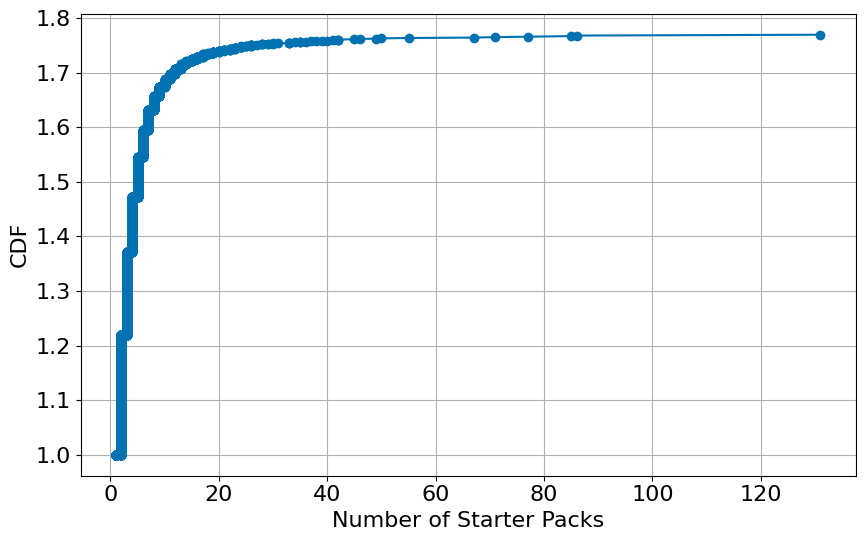

In [ ]:
starterpacks_path = "../data/nature_ignacio_academic_starter_packs/starterpacks.csv"
starterpacks_data = pd.read_csv(starterpacks_path)

participants_path = "../data/starter_packs/starter_pack_users.csv"
participants_data = pd.read_csv(participants_path)

non_empty_descriptions = starterpacks_data[starterpacks_data['description'].notna()]

academic_keywords = [
    'academic', 'academia', 'academics', 'university', 
    'universities', 'research', 'researcher',  
    'professor', 'professors', 'scholar', 'scholars', 'lecturer', 
    'lecturers', 'science', 'scientists', 
]

academic_affiliated = non_empty_descriptions[
    non_empty_descriptions['description'].str.contains('|'.join(academic_keywords), case=False, na=False)
]

academic_uris = academic_affiliated['uri'].tolist()

academic_participants = participants_data[participants_data['uri'].isin(academic_uris)]

# Flatten the participants column to get a list of all participants in academic starter packs
academic_participants_list = academic_participants['participants'].str.split(';').explode()

user_participation_counts = academic_participants_list.value_counts().reset_index()
user_participation_counts.columns = ['user_id', 'participation_count']

# Sort users by participation count
user_participation_counts = user_participation_counts.sort_values(by='participation_count')

# CDF
user_participation_counts['cdf'] = user_participation_counts['participation_count'].expanding().mean()

print("Top 10 users by participation count in academic starter packs:")
print(user_participation_counts.tail(10))

plt.figure(figsize=(10, 6))
plt.plot(user_participation_counts['participation_count'], user_participation_counts['cdf'], marker='o', linestyle='-')
plt.xlabel('Number of Starter Packs')
plt.ylabel('CDF')
# plt.title('CDF of User Inclusion in Academic Starter Packs')
plt.grid(True)
plt.show()

user_participation_counts.to_csv("../data/nature_ignacio_academic_starter_packs/academic_user_participation_counts.csv", index=False)


In [ ]:
import pandas as pd
import re
from tqdm import tqdm 
import os

file_path = "../../output_and_test_data/starter_packs/.profiles.csv.mmD4QS"

academic_keywords = [
    'academic', 'academia', 'academics', 'university',
    'universities', 'research', 'researcher',
    'professor', 'professors', 'scholar', 'scholars', 'lecturer',
    'lecturers', 'science', 'scientists',
]

output_path = "../../output_and_test_data/starter_packs/profiles_with_academic_keywords.csv"

def extract_description(profile_json):
    try:
        match = re.search(r'"description"\s*:\s*"([^"]+)"', profile_json)
        if match:
            return match.group(1)
        return ""
    except Exception as e:
        print(f"Error extracting description: {e}")
        return ""

# academic keywords in the descriptions
def contains_academic_keywords(description):
    description_lower = description.lower()  # case-insensitive
    return any(keyword in description_lower for keyword in academic_keywords)

total_profiles = 0
profiles_with_academic_keywords = 0

chunk_size = 100000  # Adjust based on memory availability
chunks = pd.read_csv(file_path, chunksize=chunk_size)

with open(output_path, "w") as output_file:
    output_file.write("profile,description,has_academic_keywords\n")

    for chunk in tqdm(chunks, desc="Processing chunks"):
        chunk['description'] = chunk['profile'].apply(extract_description)
        chunk['has_academic_keywords'] = chunk['description'].apply(contains_academic_keywords)
        total_profiles += len(chunk)
        profiles_with_academic_keywords += chunk['has_academic_keywords'].sum()

        chunk[['profile', 'description', 'has_academic_keywords']].to_csv(
            output_file, mode="a", header=False, index=False
        )

percentage_with_academic_keywords = (
    (profiles_with_academic_keywords / total_profiles) * 100 if total_profiles > 0 else 0
)

print("\n===== Academic Keyword Analysis =====")
print(f"Total profiles processed: {total_profiles}")
print(f"Profiles with academic keywords: {profiles_with_academic_keywords}")
print(f"Percentage with academic keywords: {percentage_with_academic_keywords:.2f}%")
print(f"\nResults saved to {output_path}")